In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.__version__

red_wine = pd.read_csv('red_wine.csv')
red_wine.drop(columns={'Unnamed: 0'}, inplace=True)


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df_train = red_wine.sample(frac=0.7,random_state=42)
df_valid = red_wine.drop(df_train.index)

X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)

y_train = df_train['quality']
y_valid = df_valid['quality']

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
model = keras.Sequential([
        # First layer
        layers.Dense(units=128, activation='relu', input_shape=[11]),
        # Add dropout 
        layers.Dropout(0.3),
        # Add Batch Normalization
        layers.BatchNormalization(),
        # Second Layer
        layers.Dense(units=128,activation='relu'),
        # Add droput
        layers.Dropout(0.2),
        # Add Batch Normalization
        layers.BatchNormalization(),
        # Add Final layer
        layers.Dense(units=1),
    
])

In [10]:
model.compile(
            optimizer='adam',
            loss='mae',
)

In [18]:
history = model.fit(
                    X_train,y_train,
                    validation_data=(X_valid,y_valid),
                    batch_size=128,
                    epochs=100,
                    verbose=0,
)

In [19]:
history_df = pd.DataFrame(history.history)

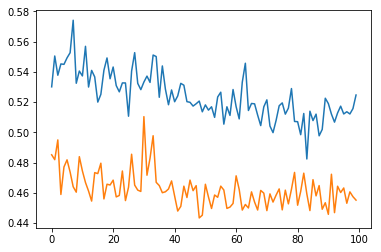

In [23]:
plt.plot(history_df.loc[:,['loss','val_loss']]);